<a href="https://colab.research.google.com/github/lucusp/data_analysis/blob/main/Page_View_Time_Series_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters 
register_matplotlib_converters()

In [ ]:
df = pd.read_csv(f'drive/MyDrive/fcc-forum-pageviews.csv')
df['date']= df['date'].astype('datetime64[ns]')
df = df.set_index('date')

df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [ ]:
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

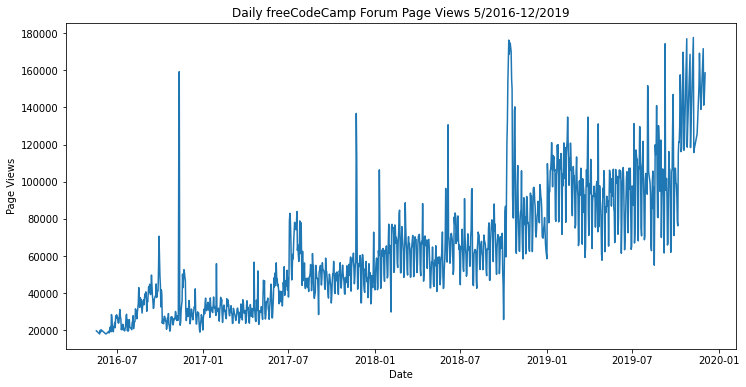

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df)
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

In [ ]:
df_bar = df.copy().reset_index()

df_bar

,date,value
0,2016-05-19,19736
1,2016-05-26,18060
2,2016-05-27,19997
3,2016-05-28,19044
4,2016-05-29,20325
...,...,...
1233,2019-11-24,138875
1234,2019-11-29,171584
1235,2019-11-30,141161
1236,2019-12-01,142918


In [ ]:
df_bar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1238 non-null   datetime64[ns]
 1   value   1238 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 19.5 KB


In [ ]:


df_bar['month'] = pd.DatetimeIndex(df_bar['date']).month_name()
df_bar['month_num'] = pd.DatetimeIndex(df_bar['date']).month_
df_bar['year'] = pd.DatetimeIndex(df_bar['date']).year

df_bar

,date,value,month,month_num,year
0,2016-05-19,19736,May,5,2016
1,2016-05-26,18060,May,5,2016
2,2016-05-27,19997,May,5,2016
3,2016-05-28,19044,May,5,2016
4,2016-05-29,20325,May,5,2016
...,...,...,...,...,...
1233,2019-11-24,138875,November,11,2019
1234,2019-11-29,171584,November,11,2019
1235,2019-11-30,141161,November,11,2019
1236,2019-12-01,142918,December,12,2019


In [ ]:
df_bar = df_bar.groupby(['year','month','month_num'])['value'].mean().reset_index().sort_values(['year','month_num'])

df_bar

,year,month,month_num,value
4,2016,May,5,19432.400000
3,2016,June,6,21875.105263
2,2016,July,7,24109.678571
0,2016,August,8,31049.193548
7,2016,September,9,41476.866667
6,2016,October,10,27398.322581
5,2016,November,11,40448.633333
1,2016,December,12,27832.419355
12,2017,January,1,32785.161290
11,2017,February,2,31113.071429


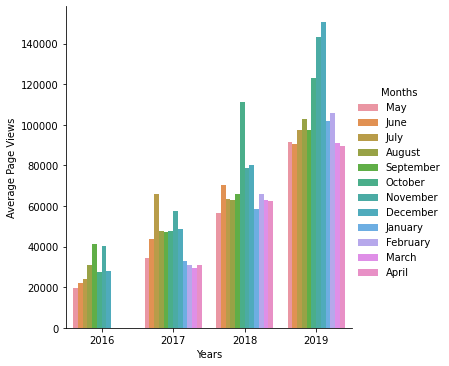

In [ ]:
g = sns.catplot(
    x='year', y='value', data = df_bar,
    kind = 'bar', hue='month')
g.set(xlabel = 'Years')
g.set(ylabel = 'Average Page Views')
g._legend.set_title('Months')

In [ ]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box['month_num'] = [d.month for d in df_box.date]
df_box = df_box.sort_values(by='month_num')

df_box

,date,value,year,month,month_num
210,2017-01-06,37353,2017,Jan,1
937,2019-01-06,94108,2019,Jan,1
936,2019-01-05,77897,2019,Jan,1
935,2019-01-04,94514,2019,Jan,1
934,2019-01-03,100710,2019,Jan,1
...,...,...,...,...,...
567,2017-12-29,72819,2017,Dec,12
566,2017-12-28,51018,2017,Dec,12
565,2017-12-27,43075,2017,Dec,12
201,2016-12-28,28424,2016,Dec,12


[Text(0.5, 1.0, 'Month-Wise Box Plot (Seasonality)')]

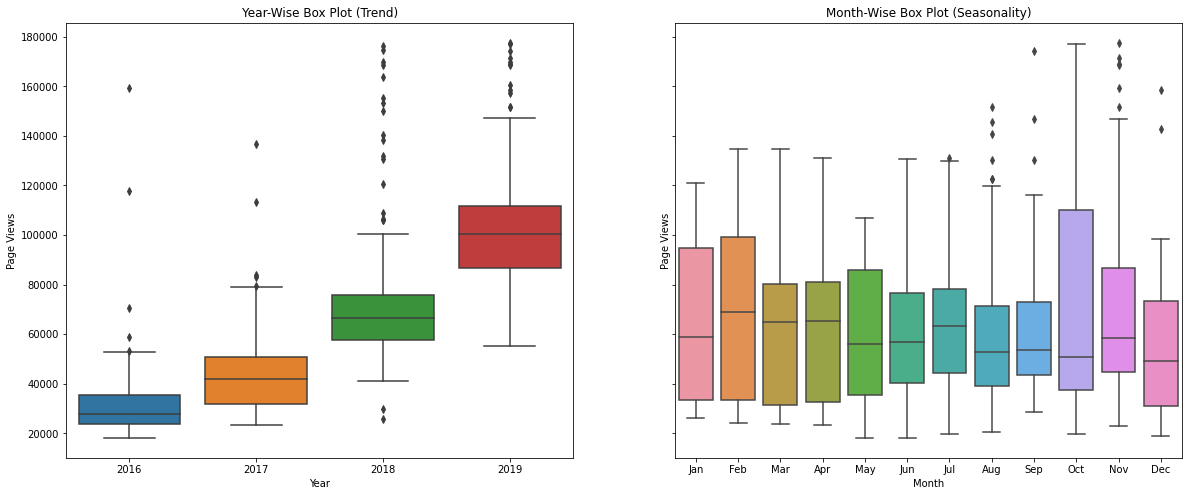

In [ ]:

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
fig.set_size_inches(20, 8)

ax1 = sns.boxplot(x=df_box['year'], y=df_box['value'], data=df_box, ax=ax1)
ax1.set(xlabel='Year')
ax1.set(ylabel='Page Views')
ax1.set(title='Year-Wise Box Plot (Trend)')

ax2 = sns.boxplot(x=df_box['month'], y=df_box['value'], data=df_box, ax=ax2)
ax2.set(xlabel='Month')
ax2.set(ylabel='Page Views')
ax2.set(title='Month-Wise Box Plot (Seasonality)')

[Text(0.5, 1.0, 'Year-Wise Box Plot (Trend)')]

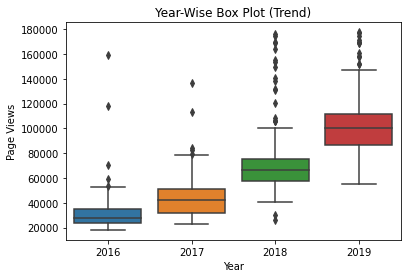

[Text(0.5, 1.0, 'Month-Wise Box Plot (Seasonality)')]

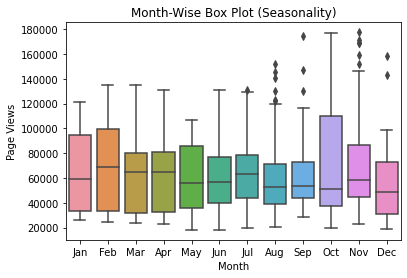